In [1]:
import matplotlib.pyplot as plt
from idi.util import diffdist
import numpy as np
from sacla import *
%matplotlib inline


In [6]:
r=saclarun('/UserData/gorkhover/TAIS2019/782510.h5',Tais2019)

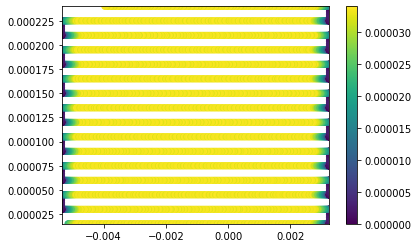

In [7]:
p=plt.scatter(r.sampleX[:-1],r.sampleZ[:-1],c=diffdist(r.sampleX,r.sampleZ))
plt.colorbar()
plt.xlim([np.min(r.sampleX),np.max(r.sampleX)])
plt.ylim([np.min(r.sampleZ),np.max(r.sampleZ)])
plt.show()





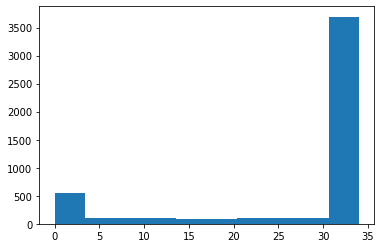

1.9999686628580093e-05


In [8]:
plt.hist(1e6*diffdist(r.sampleX))
plt.show()
print(np.percentile(diffdist(r.sampleX),20))

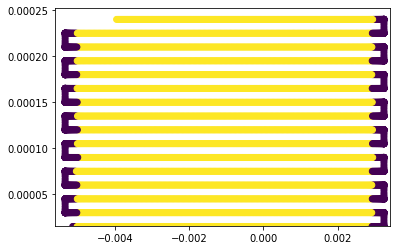

In [9]:
setdist=np.percentile(diffdist(r.sampleX),80)
mindist=setdist*0.8
distok=diffdist(r.sampleX)>mindist

p=plt.scatter(r.sampleX[:-1],r.sampleZ[:-1],c=distok)
plt.xlim([1.05*np.min(r.sampleX),1.05*np.max(r.sampleX)])
plt.ylim([1.05*np.min(r.sampleZ),1.05*np.max(r.sampleZ)])
plt.show()

In [12]:
import functools
from idi.funchelper import *

@asgen
def photons(img,photonadu,gain=1,thres=0.6):
    p=gain*np.squeeze(np.asarray(img))/photonadu
    p1=(np.trunc(p))#.astype(int)
    p=p-p1
    p2=(p>thres)#.astype(int)
    return p1+p2

@functools.lru_cache()
def intensities(detector):
    @asgen
    def intensity(img):
        return np.sum(img)
    return detector.absolute_gain*3.65*np.array(list(intensity(detector)))

def nphotons(detector,energy):
    return np.array(list(intensity(photons(detector,photonadu=energy/(3.65*detector.absolute_gain),thres=0.6))))

In [15]:
intensity=

# intok=np.logical_and(t>np.percentile(t,2),t<np.percentile(t,98))


(array([ 274., 1457., 1742.,  964.,  366.,  137.,   43.,   11.,    3.,
           3.]),
 array([4.7589000e+07, 7.3273400e+07, 9.8957808e+07, 1.2464221e+08,
        1.5032661e+08, 1.7601101e+08, 2.0169541e+08, 2.2737982e+08,
        2.5306422e+08, 2.7874861e+08, 3.0443302e+08], dtype=float32),
 <a list of 10 Patch objects>)

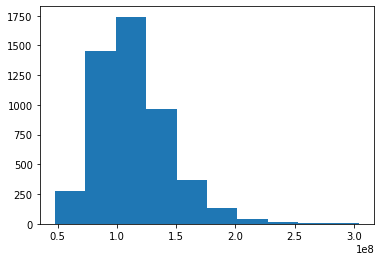

In [29]:
plt.hist(intensities(r.detector_2d_3))

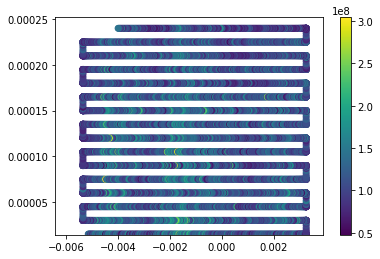

In [35]:
p=plt.scatter(r.sampleX,r.sampleZ,c=intensities(r.detector_2d_3))
plt.xlim([np.min(r.sampleX)-0.2*abs(np.min(r.sampleX)),np.max(r.sampleX)+0.2*abs(np.max(r.sampleX))])
plt.ylim([np.min(r.sampleZ)-0.05*abs(np.min(r.sampleZ)),np.max(r.sampleZ)+0.05*abs(np.max(r.sampleZ))])
plt.colorbar()
plt.show()

In [36]:
p=photons(r.detector_2d_assembled_1,6400/r.detector_2d_assembled_1.absolute_gain/3.65)
dual=[np.sum(cp) for cp in p]

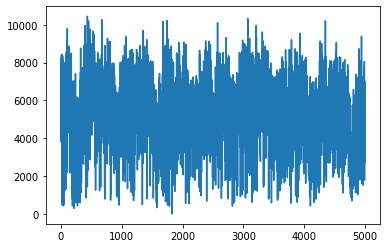

In [37]:
plt.plot(np.array(dual))
plt.show()

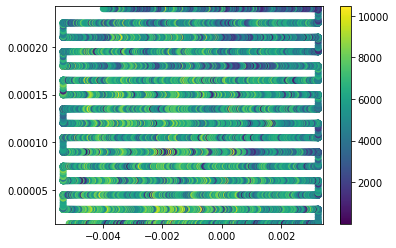

In [38]:
plt.scatter(r.sampleX,r.sampleZ,c=dual)
plt.xlim([np.min(r.sampleX)-0.05*abs(np.min(r.sampleX)),np.max(r.sampleX)+0.05*abs(np.max(r.sampleX))])
plt.ylim([np.min(r.sampleZ)-0.01*abs(np.min(r.sampleZ)),np.max(r.sampleZ)+0.01*abs(np.max(r.sampleZ))])
plt.colorbar()
plt.show()